In [1]:
import re

In [2]:
from IPython.display import clear_output

In [3]:
import requests

In [4]:
import bs4

In [5]:
from time import sleep

name of class for streaming services: "affiliate__link affiliate__link--veneer js-affiliate-link"
"affiliate__link affiliate__link--veneer js-affiliate-link" [data_affiliate]

url before "show more":
https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato=70&maxTomato=87&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres=14;2;1&sortBy=tomato

after:
https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato=70&maxTomato=87&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres=14;2;1&sortBy=tomato

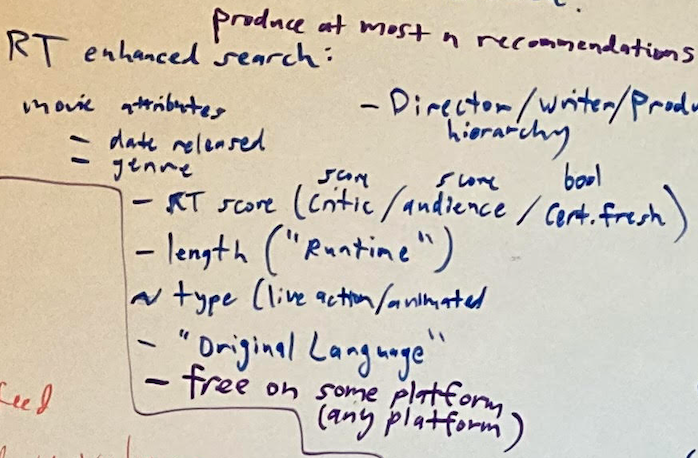

Movie attributes:

- length ("Runtime"    - date released
- type (animated)      - genre
- RT score (critic/audience/bool=cert fresh)
- original language
- platforms to watch on (free? subscription?)
- URL to the movie on RT

all of these have to go into one final boolean that determines whether or not to include that particular movie, based off of the search criteria.  (how many recommendations would you like? give the maximal number possible, up to n)


In [6]:
class Movie:
        
    def __init__(self, title, genre, scores, og_lang, release_date, length, platforms, url):
        self.genre = genre

        #         self.critic_score = critic_score
        #         self.audience_score = audience_score
        #         self.cert_fresh = cert_fresh

        self.title = title
        self.scores = scores
        self.og_lang = og_lang
        self.release_date = release_date
        self.length = length   # length is String:  cast using minutes_to_hours() method
        self.platforms = platforms
        self.url = url
        
    def __str__(self):
#         genre_string = self.genres[0]
#         for i in range(1,len(self.genres)):
#             genre_string += f", {self.genres[i]}"
        
        string = '-'*85+"\n"*3
        
        string += f"{self.title} ({self.release_date}),  Genre(s): {self.genre}\n"
        
        yn = ''
        if self.scores[2]:
            yn = 'yes'
        else:
            yn = 'no'
            
        score_string = f"Critic score: {self.scores[0]}, Audience score: {self.scores[1]}, Certified fresh: {yn}" + "\n"
        
        string += score_string
        
        string += f"Length: {self.length}, Original language: {self.og_lang}"
        
        platforms_string = ''
        if len(self.platforms) == 0:
            platforms_string = 'none'
        else:
            platforms_string = "Available platforms: "
            for key,value in self.platforms.items():
                platforms_string += f"{key}: {value}, "
            platforms_string = platforms_string[:-2]
        
        string += "\n"+platforms_string
        
        string += "\n"+self.url
        
        return string

In [41]:
class search_query:
    
    def __init__(self, selected_genres, selected_scores, selected_og_lang, selected_release_date, selected_length, selected_pay, selected_platforms):
        self.selected_genres = selected_genres
        self.selected_scores = selected_scores
        self.selected_og_lang = selected_og_lang
        self.selected_release_date = selected_release_date
        self.selected_length = selected_length
        self.selected_pay = selected_pay
        self.selected_platforms = selected_platforms
    
    def __str__(self):
        pass
    
    
#     selected_genres = inverse_genre_dict[genre_list[0]]
#     for i in range(1,len(genre_list)):
#         selected_genres += f", {inverse_genre_dict[genre_list[i]]}"
#     print(f"Selected genres: {selected_genres}\n")
    
#     print("From the genres I selected, I would only like to be shown movies..."+'\n')
#     selected_scores = select_score()
#     print()
#     selected_og_lang = select_lang()
#     print()
#     selected_release_date = select_date()
#     print()
#     selected_length = select_length()
#     print()
# #     either 'y' or 'n':
#     selected_pay = select_payment()
#     if selected_pay == 'n':
#         sleep(1)
#         clear_output()
#         selected_platforms = select_platforms()

In [ ]:
my_movie = Movie("It's Such a Beautiful Day",'Animation/Art',[100,85,True],'English',2007,'2hr',{'vudu':'Free','netflix':'subscription'},'https://www.rottentomatoes.com/')

In [ ]:
print(my_movie)

In [ ]:
counters = 0
for letter in "https://www.rottentomatoes.com/m/sherlock_holmes_and_the_woman_in_green":
    counters += 1
counters

HOURS_TO_MINUTES

In [8]:
"1h 23m"
def hours_to_minutes(hour_string):
    num = 0
    if len(hour_string) == 6:
        num = 60*int(hour_string[0]) + 10*int(hour_string[3]) + int(hour_string[4])
    if len(hour_string) == 5:
        num = 60*int(hour_string[0]) + int(hour_string[3])
    if len(hour_string) == 3:
        num = int(hour_string[0:2])
    return num
    
print(hours_to_minutes("36m"))    

36


SELECT_SEARCH_METHOD

In [42]:
def select_search_method(new_search=False):
    y_or_n = input("Would you like to modify a previous search query? Enter Y or N: ")
    if y_or_n.lower() == 'y':
        clear_output()
        print(previous_search)
        print()
        print("This is your previous search. To change a search entry, enter its corresponding number: ")
    else:
        pass
    

'select_search_method'

SELECT_GENRES

In [9]:
# Prompts user for list of genres,  returns corresponding sorted list: e.g. [1,4,18]
def select_genres():
    print("Select from the genres below: \n")
    print("Action"+' '*10+"Animation"+' '*7+"Art & Foreign"+' '*7+"Classics"+' '*8+"\nComedy"+' '*10+
          "Documentary"+' '*5+"Drama"+' '*15+"Horror"+' '*10+"\nKids & Family"+' '*3+"Mystery"+' '*9+"Sci-fi & Fantasy"+' '*4
          +"Romance")
    print('\ne.g. Enter something like "Action, Drama, Mystery"  (but exclude the quotation marks)')
    
    genres = input()
    splitted = genres.split(',')
    
#     Remove spaces
    pattern = r"( *)([a-zA-Z& -]+)( *)"
    for i in range(len(splitted)):
        match = re.search(pattern,splitted[i])
        splitted[i] = genre_dict[match.group(2).lower()]
        
    splitted.sort()
        
    return (splitted, genres)
    

SELECT_SCORE

In [10]:
# Prompts user for score lower-bound preferences and certified fresh:   e.g.  returns [80,90,True]
def select_score():
    crit_higher_than = int(input("...that have a critic score higher than:  \n"))
    aud_higher_than = int(input("...that have an audience score higher than:  \n"))
    fresh_bool = input('...that are "Certified Fresh". Enter Y or N:  ')
    if fresh_bool.lower() == 'y':
        fresh_bool = True
    else:
        fresh_bool = False
        
    return [crit_higher_than, aud_higher_than, fresh_bool]

SELECT_LANG

In [11]:
# Prompts user for whether they want movies in English only.   returns 'English' or 'any'
def select_lang():
    lang = input("...that are in English. Enter Y or N:  ")
    if lang.lower() == 'n':
        return 'any'
    else:
        return 'English'

SELECT_DATE

In [12]:
# Prompts user for lower and upper bound for movies.     returns something like [1980,2000]
def select_date():
    lower = int(input("...that were made between the year "))
    upper = int(input("and the year "))
    if upper<lower:
        temp = upper
        upper = lower
        lower = temp
    return [lower,upper]

SELECT_LENGTH

In [13]:
# Prompts user for lower and upper bound movie length     returns something like [90,150]
def select_length():
    lower = int(input("that are longer than (minutes): "))
    upper = int(input("but shorter than (minutes): "))
    if upper<lower:
        temp = upper
        upper = lower
        lower = temp
    return [lower,upper]
    

CREATE_URL

In [14]:
def create_release_url(genres,scores):
    genre_list = str(genres[0])
    for i in range(1,len(genres)):
        genre_list += ";"+str(genres[i])
    
    certified = str(scores[2]).lower()
    
    url = f'https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato={scores[0]}&maxTomato=100&certified={certified}&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres={genre_list}&sortBy=release'
    
    return url

In [15]:
def create_tomato_url(genres,scores):
    genre_list = str(genres[0])
    for i in range(1,len(genres)):
        genre_list += ";"+str(genres[i])
    
    certified = str(scores[2]).lower()
    
    url = f'https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato={scores[0]}&maxTomato=99&certified={certified}&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres={genre_list}&sortBy=tomato'
    
    return url

In [16]:
def create_tomato_url_100(genres,scores):
    genre_list = str(genres[0])
    for i in range(1,len(genres)):
        genre_list += ";"+str(genres[i])
    
    certified = str(scores[2]).lower()
    
    url = f'https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato={scores[0]}&maxTomato=100&certified={certified}&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres={genre_list}&sortBy=tomato'
    
    return url

NUM_RECOMMENDATIONS

In [17]:
# Prompts user for number of movie recommendations       returns an int
def num_recommendations():
    num = int(input("How many movie recommendations do you want to see?  "))
    return num

SELECT_PLATFORMS

In [18]:
# Returns list of soup-formatted platforms
def select_platforms():
    print("I would like to be shown movies that are available for free from (or with a subscription to) the platforms below: \n")
    print("Amazon Prime"+' '*3+"Hulu"+' '*11+"Netflix"+' '*8+"Disney+"+' '*5+"ESPN Plus"+' '*6+
          "\nHBO Go"+' '*9+"HBO Max"+' '*8+"HBO Now"+' '*8+"Peacock"+' '*5+"Vudu"+' '*11+"\nApple TV"+' '*7
          +"iTunes"+' '*9+"XFINITY"+' '*8+"E! Online"+' '*6)
    print('\ne.g. Enter something like "Netflix, Amazon Prime, Vudu"  (but exclude the quotation marks)')
    
    platforms = input()
    splitted = platforms.split(',')
    
#     Remove spaces
    pattern = r"( *)([a-zA-Z&!-]+) *([a-zA-Z&!-]+)( *)"
#     pattern = r"( *)(.+?) *(.+)( *)"
    for i in range(len(splitted)):
        match = re.search(pattern,splitted[i])
        to_dict = match.group(2)+match.group(3)
        splitted[i] = platform_dict_selected_to_soup[to_dict.lower()]
        
#     splitted.sort()  # I think this is unnecessary

# Now splitted is a list of soup-language platforms

    print(splitted)
    return splitted

In [ ]:
select_platforms()

SELECT_PAYMENT

In [19]:
# Returns 'y' if the user is okay with spending money, 'n' otherwise
def select_payment():
    yes_or_no = input("Are you okay with spending money on a movie? Enter Y or N: ")
    if yes_or_no.lower() == 'y':
        return 'y'
    else:
        return 'n'
        

In [20]:
# platforms: vudu, peacock, netflix, hulu, amazon-prime-video-us, disney-plus-us, espn-plus, apple-tv-plus-us,
# hbo-now, hbo-go, hbo-max, itunes, xfinity, e-online


platform_dict_selected_to_soup = {'vudu':'vudu', 'peacock':'peacock', 'netflix':'netflix', 'hulu':'hulu',
                                  'amazonprime':'amazon-prime-video-us', 'amazon':'amazon-prime-video-us',
                                  'prime':'amazon-prime-video-us', 'disney+':'disney-plus-us',
                                  'disneyplus':'disney-plus-us', 'disney':'disney-plus-us', 'espnplus':'espn-plus',
                                  'espn':'espn-plus', 'appletvplus':'apple-tv-plus-us', 'appletv':'apple-tv-plus-us',
                                  'apple':'apple-tv-plus-us', 'hbonow':'hbo-now', 'hbogo':'hbo-go', 'hbomax':'hbo-max',
                                  'itunes':'itunes', 'xfinity':'xfinity', 'e!online':'e-online', 'e-online':'e-online', 'eonline':'e-online'
                                 }

# Turns soup language into a printable form
platform_dict_soup_to_printable = {'vudu':'Vudu',
                                   'peacock':'Peacock',
                                   'netflix':'Netflix',
                                   'hulu':'Hulu',
                                   'amazon-prime-video-us':'Amazon Prime',
                                   'disney-plus-us':'Disney+',
                                   'espn-plus':'ESPN Plus',
                                   'apple-tv-plus-us':'Apple TV',
                                   'hbo-now':'HBO Now',
                                   'hbo-go':'HBO Go',
                                   'hbo-max':'HBO Max',
                                   'itunes':'iTunes',
                                   'xfinity':'XFINITY',
                                   'e-online':'E! Online'}


In [33]:

genre_dict = {'action':1, 'animation':2, 'art & foreign':4, 'art':4, 'foreign':4, 'art&foreign':4, 'classics':5,'comedy':6, 'documentary':8, 'drama':9,
              'horror':10, 'kids & family':11, 'kids':11, 'mystery':13, 'sci-fi & fantasy':14, 'sci-fi':14, 'scifi':14, 'sci-fy':14, 'scify':14, 'fantasy':14, 'scifi & fantasy':14, 'romance':18}
inverse_genre_dict = {value:key.capitalize() for key,value in genre_dict.items()}
inverse_genre_dict = {1: 'Action', 2: 'Animation', 4: 'Art & Foreign', 5: 'Classics', 6: 'Comedy', 8: 'Documentary', 9: 'Drama', 10: 'Horror', 11: 'Kids & Family', 13: 'Mystery', 14: 'Sci-fi & Fantasy', 18: 'Romance'}



In [ ]:
# first thing to do in the main client is to prompt for how many movie recommendations they want
# in between each prompt, print a few lines


NOTE: if certified_fresh,   might want to sort by release date rather than tomatometer

In [ ]:
def enhanced_search():

    print("Rotten Tomatoes enhanced search"+'\n'*2)
    
    #     title, genre, scores, og_lang, release_date, length, platforms, url
    
    genre_list,genre_string = select_genres()
    sleep(2)
    clear_output()
    
#     selected_genres, selected_scores, selected_og_lang, selected_release_date, selected_length, selected_pay
    
    selected_genres = inverse_genre_dict[genre_list[0]]
    for i in range(1,len(genre_list)):
        selected_genres += f", {inverse_genre_dict[genre_list[i]]}"
    print(f"Selected genres: {selected_genres}\n")
    
    print("From the genres I selected, I would only like to be shown movies..."+'\n')
    selected_scores = select_score()
    print()
    selected_og_lang = select_lang()
    print()
    selected_release_date = select_date()
    print()
    selected_length = select_length()
    print()
#     either 'y' or 'n':
    selected_pay = select_payment()
    if selected_pay == 'n':
        sleep(1)
        clear_output()
        selected_platforms = select_platforms()
    print()
    
    print("Search criteria complete.")
    print()
    sleep(2)
    clear_output()
    print("Search criteria complete.")
    
    n = num_recommendations()
    
    sleep(2)
    clear_output()
    print("Searching for movies...")
    
    initial_url = create_tomato_url_100(genre_list,selected_scores)
    
    
    res = requests.get(initial_url)
    initial_soup = bs4.BeautifulSoup(res.text,'lxml')
    
#     title, genre, scores, og_lang, release_date, length, platforms, url

    url_list = []
#     movies_looked_at = 0
    movies_added = 0    # check that movies_added < n
    movies_looked_at = -1
    movie_list = []
    
    ListItem_pattern = r'"ListItem","position":\d+,"url":"(/m/.+?)"'
    if not selected_scores[2]:
        for ListItem in re.finditer(ListItem_pattern,res.text):
            url_list.append(ListItem.group(1))
    else:
        for ListItem in re.finditer(ListItem_pattern,res.text):
#             if it's certified fresh
#             in the doc, have to navigate to the listitem and locate its logo
            
            url_list.append(ListItem.group(1))
        
        
    movie_url = ''
    for url in url_list:
        
        movies_looked_at += 1
        if movies_looked_at >= 32:
            break
       
        if movies_added >= n:
            break

        movie_url = "https://www.rottentomatoes.com"+url
        result = requests.get(movie_url)
        soup = bs4.BeautifulSoup(result.text,'lxml')

        print(movie_url)
        print()
#         first check if it's certified fresh, (do more research)
        
        aud_cri_soup = soup.select("score-board")
        
        audience_score = ''
        critic_score = ''
        
        try:
            audience_score = int(aud_cri_soup[0]["audiencescore"])
        except:
            continue
        try:
            critic_score = int(aud_cri_soup[0]["tomatometerscore"])
        except:
            continue

        certified_fresh = False
        certified_soup = soup.select("#mps-page-integration")
        certified_pattern = r'certified_fresh]":"(\d)"'
        certified_match = re.search(certified_pattern,str(certified_soup[0]))

        if certified_match.group(1) == '1':
            certified_fresh = True
            
        scores = [critic_score,audience_score,certified_fresh]
        
        if selected_scores[2] and certified_fresh == False:
            continue
            
        if selected_scores[0] > scores[0] or selected_scores[1] > scores[1]:
            continue
            
#         --------------------
        
#         Check if the movie is available for free or subscription on any selected_platforms
        
        
        
        
        
        platforms = {}
        has_a_selected_platform = False
        
        platforms_soup = soup.select(".affiliate__link")
        # rel_gen_len_pattern = r"(\d{4}), (.+?), (\dh \d+?m)"
        # rel_gen_len_match = re.search(rel_gen_len_pattern,rel_gen_len_soup[0].text)

        for match in platforms_soup:
            key = match["data-affiliate"]
            
            if key == "showtimes":
                continue
            
            value = match.p.string.lower()
            
            
            if selected_pay == 'n' and key in selected_platforms and (value == 'free' or value == 'subscription'):  # have to 1) create sel_plat and 2) create dict
                has_a_selected_platform = True
                platforms.update({platform_dict_soup_to_printable[key]:value})
                
            elif selected_pay == 'y':
                has_a_selected_platform = True
                platforms.update({platform_dict_soup_to_printable[key]:value})
                
            else:
                continue
                
            
            
        if not has_a_selected_platform:
            continue
            
            
        
        
        rel_gen_len_soup = soup.select(".scoreboard__info")
#       old:   rel_gen_len_pattern = r"(\d{4}), *?(.*?),*? (\dh \d+?m)"
        rel_gen_len_pattern = r"(\d{4}), *? (.*?),*? (\d*h* *\d+?m)"
        rel_gen_len_match = re.search(rel_gen_len_pattern,rel_gen_len_soup[0].text)

        release_date = int(rel_gen_len_match.group(1))
        
        if selected_release_date[0] > release_date or selected_release_date[1] < release_date:
            continue

        genre = rel_gen_len_match.group(2)

        length = rel_gen_len_match.group(3)
        
        if selected_length[0] > hours_to_minutes(length) or selected_length[1] < hours_to_minutes(length):
            continue

    #         need scores, og_lang, platforms, (we have url: it's stored in movie_url)
    #             I'm thinking that we store platforms in the form of a dictionary

        

        
#         This section could probably be improved using things like .classname.p
        og_lang = ''
        count = 0
        ready = False
        for match in soup.select(".meta-row"):
            for child in match.children:
                if not ready:
                    try:
        #                 print(child.text)
                        if child.text == "Original Language:":
                            ready = True
                    except:
        #                 print("1212121212121212121212121212121212121212")
                        pass
                else:
                    count += 1
                    if count == 2:
                        try:
                            og_lang = child.text
                        except:
                            pass
                        
        if og_lang == '':
            og_lang = "not listed"
        
        if selected_og_lang == 'English':
            if og_lang == "not listed":
                pass
            elif og_lang[0:7] != 'English':
                continue
            else:
                pass

            
        

#         Scrape title
        title_soup = soup.select('title')
        title_pattern = r"(.+) - Rotten Tomatoes"
        title_match = re.search(title_pattern,title_soup[0].text)

        title = title_match.group(1)
        

#         Create movie object
        movie = Movie(title, genre, scores, og_lang, release_date, length, platforms, movie_url)
        movie_list.append(movie)
        movies_added += 1
        print("+1")
        
        
    clear_output()
    
    if movies_added < n:
        print("Sorry, we were unable to find that many movies.\n")
        
    if movies_added == 1:
        print(f"Here is {movies_added} that matches your search criteria!"+"\n"*2)
    else:
        print(f"Here are {movies_added} that match your search criteria!"+"\n"*2)
    
    for mov in movie_list:
        print(mov)
        print("\n")
        
#     if movies_looked_at >= 32:
#         pass

In [ ]:
amazon prime, hulu, netflix, disney+, hbo max, peacock, vudu

In [ ]:
# platforms: vudu, peacock, netflix, hulu, amazon-prime-video-us, disney-plus-us, espn-plus, apple-tv-plus-us,
# hbo-now, hbo-go, hbo-max, itunes, xfinity, e-online

In [22]:
from selenium import webdriver
from random import randint

In [23]:
from selenium.webdriver.chrome.options import Options

In [57]:
def enhanced_search1():

    print("Rotten Tomatoes enhanced search"+'\n'*2)
    
    
    # select_genres():    [1,4,18]
    # select_score():     [80,90,True]
    # select_lang():      'English' or 'any'
    # select_date():      [1980,2000]
    # select_length():    [90,150]
    
    #     title, genre, scores, og_lang, release_date, length, platforms, url
    
    genre_list,genre_string = select_genres()
    sleep(2)
    clear_output()
    
    selected_genres = inverse_genre_dict[genre_list[0]]
    for i in range(1,len(genre_list)):
        selected_genres += f", {inverse_genre_dict[genre_list[i]]}"
    print(f"Selected genres: {selected_genres}\n")
    
    print("From the genres I selected, I would only like to be shown movies..."+'\n')
    selected_scores = select_score()
    print()
    selected_og_lang = select_lang()
    print()
    selected_release_date = select_date()
    print()
    selected_length = select_length()
    print()
#     either 'y' or 'n':
    selected_pay = select_payment()
    if selected_pay == 'n':
        sleep(1)
        clear_output()
        selected_platforms = select_platforms()
    print()
    
    print("Search criteria complete.")
    print()
    sleep(3)
    clear_output()
    print("Search criteria complete.")
    
    n = num_recommendations()
    
    sleep(2)
    clear_output()
    print("Searching for movies...")
    
    initial_url = create_release_url(genre_list,selected_scores)
    secondary_url = create_tomato_url(genre_list,selected_scores)
    
    driver = webdriver.Chrome('/Users/bean/Desktop/Jupyter Notebooks/chromedriver')

    # Make it run in background

    # options = Options()
    # options.add_argument("--headless")
    # self.driver = webdriver.Chrome(options=options)

    # options = webdriver.ChromeOptions()
    # options.add_argument('headless')
    # options.add_argument('window-size=1200x600')

    driver.get(initial_url)
    
    driver.find_element_by_css_selector('.fontelloIcon.icon-list').click()

    
    # Click the button exactly 5 times
    for n in range(5):
        driver.find_element_by_css_selector('.btn.btn-secondary-rt.mb-load-btn').click()
        s = randint(3, 5)
        sleep(s)
        
        
    page = driver.page_source

    # soup = bs4.BeautifulSoup(page, "html.parser")
    initial_soup = bs4.BeautifulSoup(page, "lxml")
    
    
    
#     title_list = soup.find_all("h3", class_="movieTitle")
#     for title in title_list:
#         print(title.get_text())

    driver.get(secondary_url)
    
    driver.find_element_by_css_selector('.fontelloIcon.icon-list').click()
    
    # Click the button exactly 5 times
    for n in range(5):
        driver.find_element_by_css_selector('.btn.btn-secondary-rt.mb-load-btn').click()
        s = randint(3, 5)
        sleep(s)
    
    page = driver.page_source

    # soup = bs4.BeautifulSoup(page, "html.parser")
    secondary_soup = bs4.BeautifulSoup(page, "lxml")
   
    driver.quit()
    
    
#     res = requests.get(initial_url)

    
#     title, genre, scores, og_lang, release_date, length, platforms, url



    
    movies_added = 0
    movies_looked_at = -1
    movie_list = []
    
    url_list = set({})
    
#     in this order: "id":771560806, ...  "url":"/m/man_in_camo","tomatoIcon":"fresh","tomatoScore"  "runtime"
# {"id":771522261,"title":"Man in Camo","url":"/m/man_in_camo","tomatoIcon":"fresh","tomatoScore":100,"dvdReleaseDate":"May 20","mpaaRating":"NR","synopsis":"A close",
# "synopsisType":"synopsis","runtime":"1 hr. 25 min.","posters":{"thumborId":
    
    
#     ListItem_pattern = r'"ListItem","position":\d+,"url":"(/m/.+?)"'


    pattern_url_tomatoIcon_tomatoScore_runtime = r'"url":"(/m/.+?)","tomatoIcon":"(.+?)","tomatoScore":(\d+),(.+?)"thumborId"'

    runtime_pattern = r'"runtime":"(.+?)"'

    soups = (initial_soup, secondary_soup)
    
    for soup in soups:
    
        for match in re.finditer(pattern_url_tomatoIcon_tomatoScore_runtime, soup.prettify()):

            if selected_scores[2] and not (match.group(2)=="certified_fresh"):
                continue

            if int(match.group(3)) < selected_scores[0]:
                continue

        #     searching within this for runtime: match.group(4)


            try:
                runtime_string_with_spaces = re.search(runtime_pattern, match.group(4)).group(1)
                runtime_string_no_spaces = runtime_string_with_spaces.replace(' ','')
                length_pattern = r"(\d)hr\.(\d+)min\."

            #     length is either 3, 9, or 10

                if len(runtime_string_no_spaces) >= 9:
                    length_match = re.search(length_pattern,runtime_string_no_spaces)
                    hours = length_match.group(1)
                    minutes = length_match.group(2)
                    runtime_string = hours+"h "+minutes+"m"
                    runtime = hours_to_minutes(runtime_string)

                elif len(runtime_string_no_spaces) > 1:
                    runtime = int(runtime_string_no_spaces[:-3])

            except:
                runtime = "not listed"

            if type(runtime) == int and (runtime < selected_length[0] or runtime > selected_length[1]):
                continue

            url_list.add(match.group(1))
        

        
    movie_url = ''
    print(f"URL List contains {len(url_list)} movies")
    
    for url in url_list:
        
        movies_looked_at += 1
#         if movies_looked_at >= 32:
#             break
       
        if movies_added == n:
            break

        movie_url = "https://www.rottentomatoes.com"+url
        result = requests.get(movie_url)
        soup = bs4.BeautifulSoup(result.text,'lxml')

        print(movie_url)
        print()
        
    
#             Accounted for:


        aud_cri_soup = soup.select("score-board")
        
        audience_score = ''
        critic_score = ''
        
        try:
            audience_score = int(aud_cri_soup[0]["audiencescore"])
        except:
            continue
        try:
            critic_score = int(aud_cri_soup[0]["tomatometerscore"])
        except:
            continue


        certified_fresh = False
        certified_soup = soup.select("#mps-page-integration")
        certified_pattern = r'certified_fresh]":"(\d)"'
        certified_match = re.search(certified_pattern,str(certified_soup[0]))

        if certified_match.group(1) == '1':
            certified_fresh = True
            
        scores = [critic_score,audience_score,certified_fresh]
        
#         if selected_scores[2] and certified_fresh == False:
#             continue
            
        if selected_scores[0] > scores[0] or selected_scores[1] > scores[1]:
            continue
            
#         --------------------
        
#         Check if the movie is available for free or subscription on any selected_platforms
        
        
        platforms = {}
        has_a_selected_platform = False
        
        platforms_soup = soup.select(".affiliate__link")

        for match in platforms_soup:
            key = match["data-affiliate"]
            
            if key == "showtimes":
                continue
            
            value = match.p.string.lower()
            
            
            if selected_pay == 'n' and key in selected_platforms and (value == 'free' or value == 'subscription'):  # have to 1) create sel_plat and 2) create dict
                has_a_selected_platform = True
                platforms.update({platform_dict_soup_to_printable[key]:value})
                
            elif selected_pay == 'y':
                has_a_selected_platform = True
                platforms.update({platform_dict_soup_to_printable[key]:value})
                
            else:
                continue
                
            
            
        if not has_a_selected_platform:
            continue
            
            
        
        
        rel_gen_len_soup = soup.select(".scoreboard__info")
#       old:   rel_gen_len_pattern = r"(\d{4}), *?(.*?),*? (\dh \d+?m)"
        rel_gen_len_pattern = r"(\d{4}), *? (.*?),*? (\d*h* *\d+?m)"
        rel_gen_len_match = re.search(rel_gen_len_pattern,rel_gen_len_soup[0].text)

        release_date = int(rel_gen_len_match.group(1))
        
        if selected_release_date[0] > release_date or selected_release_date[1] < release_date:
            continue

        genre = rel_gen_len_match.group(2)

        length = rel_gen_len_match.group(3)
        
        
#         Length is accounted for:
        
#         if selected_length[0] > hours_to_minutes(length) or selected_length[1] < hours_to_minutes(length):
#             continue

    
#         This section could probably be improved using things like .classname.p
        og_lang = ''
        count = 0
        ready = False
        for match in soup.select(".meta-row"):
            for child in match.children:
                if not ready:
                    try:
        #                 print(child.text)
                        if child.text == "Original Language:":
                            ready = True
                    except:
        #                 print("1212121212121212121212121212121212121212")
                        pass
                else:
                    count += 1
                    if count == 2:
                        try:
                            og_lang = child.text
                        except:
                            pass
                        
        if og_lang == '':
            og_lang = "not listed"
        
        if selected_og_lang == 'English':
            if og_lang == "not listed":
                pass
            elif og_lang[0:7] != 'English':
                continue
            else:
                pass

            
        

#         Scrape title
        title_soup = soup.select('title')
        title_pattern = r"(.+) - Rotten Tomatoes"
        title_match = re.search(title_pattern,title_soup[0].text)

        title = title_match.group(1)
        

#         Create movie object
        movie = Movie(title, genre, scores, og_lang, release_date, length, platforms, movie_url)
        movie_list.append(movie)
        movies_added += 1
        print("+1")
        
        
    clear_output()
    
    print(f"movies_added = {movies_added}")
    print(f"n = {n}")
    if movies_added < n:
        print("Sorry, we were unable to find that many movies.\n")
        
    if movies_added == 1:
        print(f"Here is {movies_added} that matches your search criteria!"+"\n"*2)
    else:
        print(f"Here are {movies_added} that match your search criteria!"+"\n"*2)
    
    for mov in movie_list:
        print(mov)
        print("\n")
        
#     if movies_looked_at >= 32:
#         pass

In [59]:
enhanced_search1()

movies_added = 4
n = 4
Here are 4 that match your search criteria!


-------------------------------------------------------------------------------------


I Am Lisa (2020),  Genre(s): Horror/Mystery & thriller
Critic score: 91, Audience score: 81, Certified fresh: no
Length: 1h 32m, Original language: English
                    
Available platforms: Peacock: free, Amazon Prime: subscription
https://www.rottentomatoes.com/m/i_am_lisa


-------------------------------------------------------------------------------------


Killer Concept (2021),  Genre(s): Mystery & thriller/Horror
Critic score: 83, Audience score: 100, Certified fresh: no
Length: 1h 21m, Original language: English
                    
Available platforms: Amazon Prime: subscription
https://www.rottentomatoes.com/m/killer_concept


-------------------------------------------------------------------------------------


The Loved Ones (2009),  Genre(s): Horror/Mystery & thriller
Critic score: 98, Audience score: 73, Cer

In [ ]:
amazon prime, hulu, netflix, disney+, hbo max, peacock, vudu

## Notes for improvement:   keep track of minimum movie score scanned for each 

In [60]:
import numpy as np

In [70]:
a = np.array([-1,-2,-3,-4,4,-5])
sum(a)

-11

In [62]:
for element in a:
    print(element)

1
2
3


In [63]:
output = 0
for element in a:
    output += element**2.0
output**0.5

3.7416573867739413

In [66]:
def Linf_norm(vec):
    output = 0
    for element in vec:
        if abs(element) > output:
            output = abs(element)
    return output

In [71]:
Linf_norm(a)

5

In [73]:
A = np.array([[1,2],[3,4],[5,6]])

In [74]:
A.shape

(3, 2)

In [75]:
A[0][0] = 5
A

array([[5, 2],
       [3, 4],
       [5, 6]])

In [86]:
A = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])
A_size = A.shape
D = np.zeros(shape=A_size)
L = np.zeros(shape=A_size)
U = np.zeros(shape=A_size)

# Create D
for row in range(A_size[0]):
    D[row][row] = A[row][row]

# Create L
for col in range(0,A_size[1]-1):
    for row in range(col+1,A_size[1]):
        L[row][col] = A[row][col]
        
# Create U
for row in range(0,A_size[0]):
    for col in range(row+1,A_size[1]):
        U[row][col] = A[row][col]
    
print(f"A = {A}")
print(D)
print()
print(L)
print()
print(U)
print()
print(D+L+U)

A = [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[ 1.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.]
 [ 0.  0. 13.  0.  0.]
 [ 0.  0.  0. 19.  0.]
 [ 0.  0.  0.  0. 25.]]

[[ 0.  0.  0.  0.  0.]
 [ 6.  0.  0.  0.  0.]
 [11. 12.  0.  0.  0.]
 [16. 17. 18.  0.  0.]
 [21. 22. 23. 24.  0.]]

[[ 0.  2.  3.  4.  5.]
 [ 0.  0.  8.  9. 10.]
 [ 0.  0.  0. 14. 15.]
 [ 0.  0.  0.  0. 20.]
 [ 0.  0.  0.  0.  0.]]

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]


In [87]:
w = 1.5
w*A

array([[ 1.5,  3. ,  4.5,  6. ,  7.5],
       [ 9. , 10.5, 12. , 13.5, 15. ],
       [16.5, 18. , 19.5, 21. , 22.5],
       [24. , 25.5, 27. , 28.5, 30. ],
       [31.5, 33. , 34.5, 36. , 37.5]])

In [90]:
from numpy.linalg import inv

In [94]:
A = np.array([[40,-10,0,0,0],[-10,40,-10,0,0],[0,-10,40,-10,0],[0,0,-10,40,-10],[0,0,0,-10,40]])
A_size = A.shape
D = np.zeros(shape=A_size)
L = np.zeros(shape=A_size)
U = np.zeros(shape=A_size)

# Create D
for row in range(A_size[0]):
    D[row][row] = A[row][row]

# Create L
for col in range(0,A_size[1]-1):
    for row in range(col+1,A_size[1]):
        L[row][col] = A[row][col]
        
# Create U
for row in range(0,A_size[0]):
    for col in range(row+1,A_size[1]):
        U[row][col] = A[row][col]

array([[  0., -10.,   0.,   0.,   0.],
       [  0.,   0., -10.,   0.,   0.],
       [  0.,   0.,   0., -10.,   0.],
       [  0.,   0.,   0.,   0., -10.],
       [  0.,   0.,   0.,   0.,   0.]])

In [98]:
[0 for num in range(4)]

[0, 0, 0, 0]

In [101]:
[[1.0] for num in range(4)]

[[1.0], [1.0], [1.0], [1.0]]

In [107]:
A_first_row = [0.0 for num in range(7)]
A_first_row[0] = 40.0
A_first_row[1] = -10.0

A_last_row = [0.0 for num in range(7)]
A_last_row[5] = -10.0
A_last_row[6] = 40.0

A = [A_first_row]
for i in range(1,6):
    ith_row = [0.0 for num in range(i-1)] + [-10.0,40.0,-10.0] + [0.0 for num in range(5-i)]
    A.append(ith_row)
A.append(A_last_row)


A = np.array(A)
b = np.array([[1.0] for i in range(7)])

print(A,A.shape)
print(b,b.shape)

[[ 40. -10.   0.   0.   0.   0.   0.]
 [-10.  40. -10.   0.   0.   0.   0.]
 [  0. -10.  40. -10.   0.   0.   0.]
 [  0.   0. -10.  40. -10.   0.   0.]
 [  0.   0.   0. -10.  40. -10.   0.]
 [  0.   0.   0.   0. -10.  40. -10.]
 [  0.   0.   0.   0.   0. -10.  40.]] (7, 7)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] (7, 1)
